# **Fashion MNIST**

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report

Prepare the data

In [135]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# check the shape of the data
print('Number of images in the training dataset:', x_train.shape[0])
print('Number of images in the testing dataset:', x_test.shape[0])
print(f"Shape of the images in the training dataset: {x_train[0].shape}")

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Shape of the images in the training dataset: (28, 28, 1)


Visualize the data

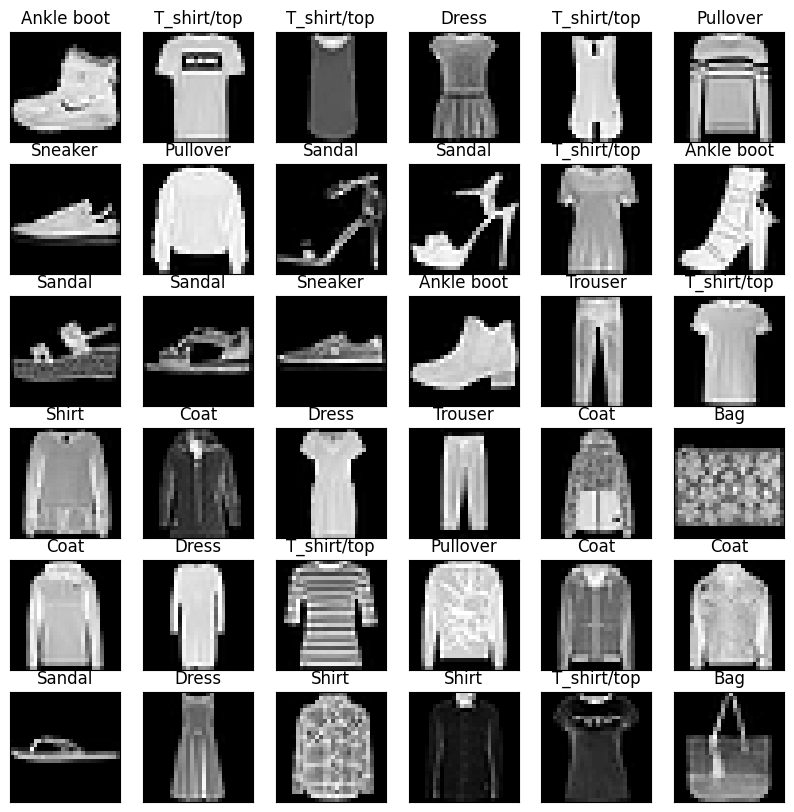

In [136]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap='gray')
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

### **Prepare the model**

In [137]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,042 (953.29 KB)

 Non-trainable params: 256 (1.00 KB)

In [138]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

### **Train the model**

In [139]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=64, 
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7936 - loss: 0.5934 - val_accuracy: 0.8680 - val_loss: 0.3669 - learning_rate: 0.0010
Epoch 2/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8790 - loss: 0.3294 - val_accuracy: 0.8960 - val_loss: 0.2769 - learning_rate: 0.0010
Epoch 3/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.8971 - loss: 0.2779 - val_accuracy: 0.9038 - val_loss: 0.2691 - learning_rate: 0.0010
Epoch 4/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9071 - loss: 0.2516 - val_accuracy: 0.9027 - val_loss: 0.2577 - learning_rate: 0.0010
Epoch 5/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9145 - loss: 0.2289 - val_accuracy: 0.9067 - val_loss: 0.2789 - learning_rate: 0.0010
Epoch 6/64
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9205 - loss: 0.2104 - val_accuracy: 0.9028 - val_loss: 0.2605 - learning_rate: 0.0010


### **Evaluate**


Text(0.5, 1.0, 'Train - Accuracy')

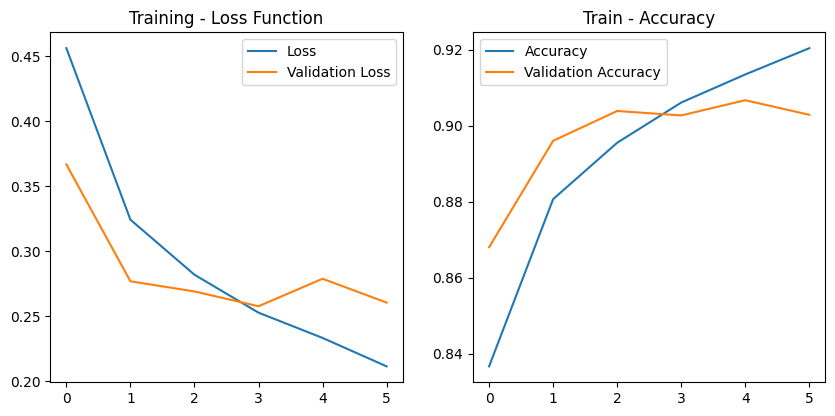

In [140]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [141]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9036 - loss: 0.2739
Test accuracy: 89.96%


In [142]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_test, y_pred, target_names=class_names))

correct = np.nonzero(y_pred == y_test)[0]
incorrect = np.nonzero(y_pred != y_test)[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.79      0.83      1000
       Dress       0.93      0.87      0.90      1000
        Coat       0.75      0.94      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.69      0.72      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



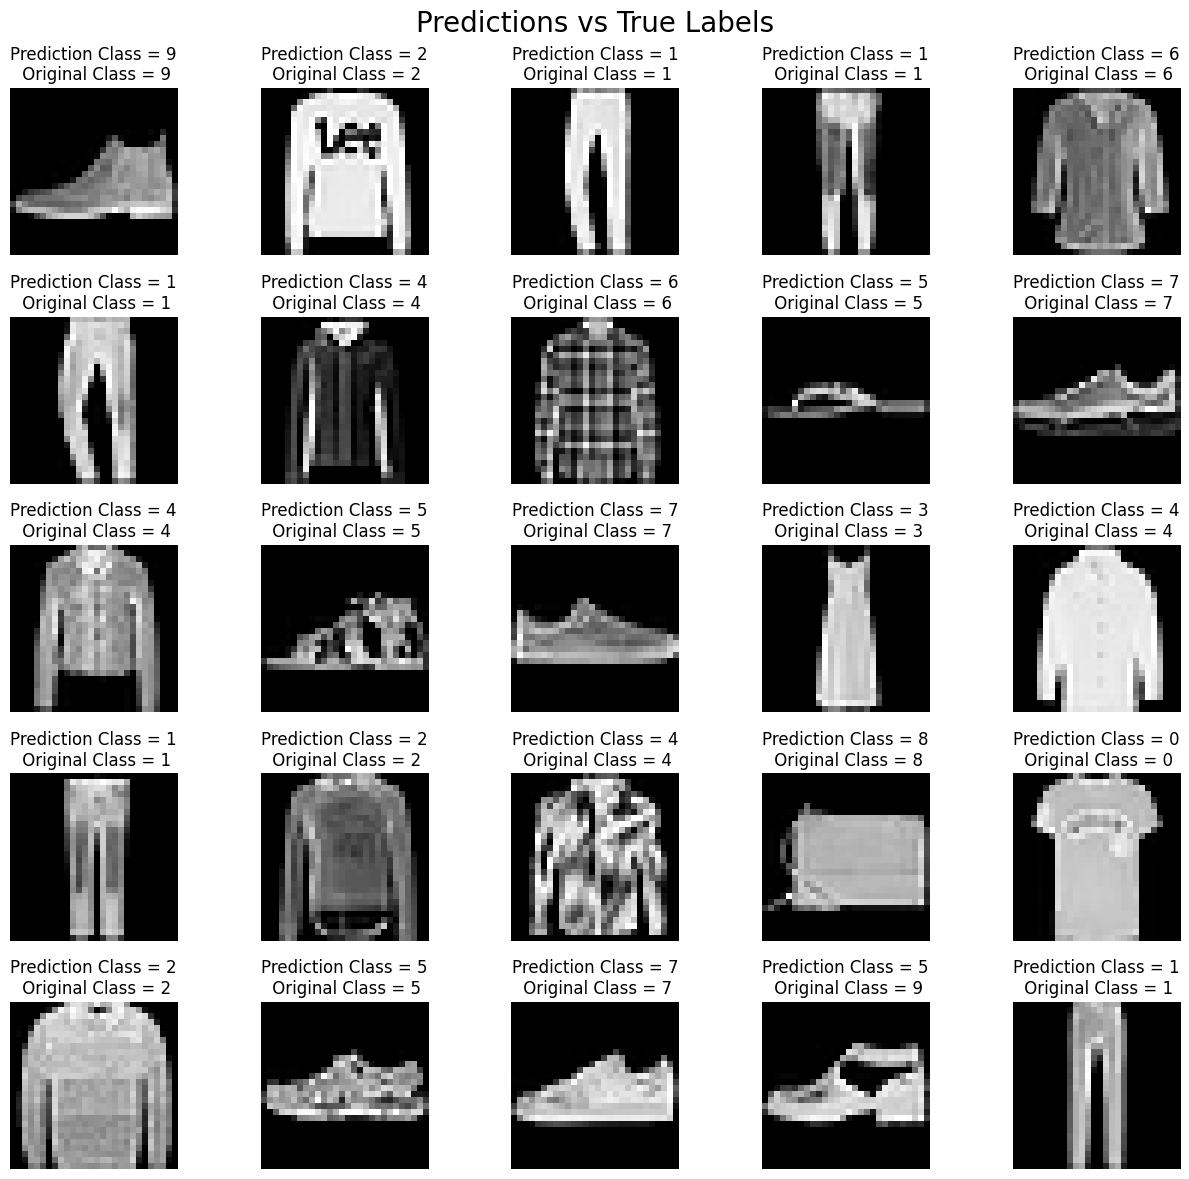

In [143]:
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, 5 * 5):  
    axes[i].imshow(x_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Prediction Class = {y_pred[i]:0.0f}\n Original Class = {y_test[i]:0.0f}")
    axes[i].axis('off')

fig.suptitle("Predictions vs True Labels", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)